### ***Problem03***
---

In [2]:
### Import library & data set
# library
from google.colab import drive
drive.mount("/content/drive")
import sys
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# MNIST
df = load_digits()

Mounted at /content/drive


In [15]:
class PCA:
    def __init__(self, d=None):
        self.d=d
        self.features=None
        self._mean=None

    def fit(self,X):
        # Centralize
        mean_vec = np.mean(X, axis=0)
        X_std = StandardScaler().fit_transform(X)
        # get covariance of X
        mean_vec = np.mean(X_std,axis=0)
        covariance = (X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)
        # get eigen values and vector
        eigenvalues,eigenvector = np.linalg.eig(covariance)
        eig_pairs  = [(np.abs(eigenvalues[i]),eigenvector[:,i])for i in range(len(eigenvalues))]
        eig_pairs.sort(key=lambda x:x[0],reverse=True)
        eigenvalue = eig_pairs[0][0]
        eig_vec = eig_pairs[0][1]
        eig_vec = pd.DataFrame([i[1] for i in eig_pairs]).iloc[:, :self.d]
        result = X @ eig_vec
        return result

train confusion matrix


<Figure size 300x300 with 0 Axes>

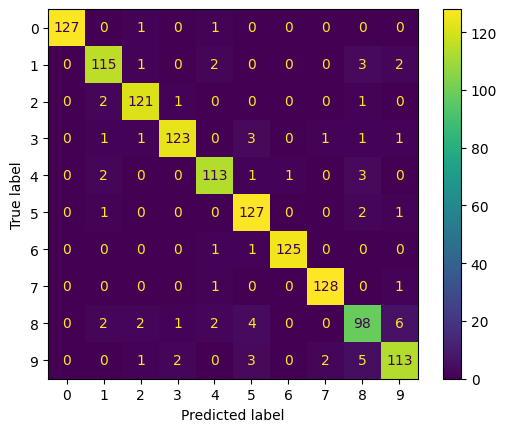

In [18]:
### mnist
# data split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=22)
# PCA
pca = PCA(d=20)
X_train = pca.fit(X_train)
# logistic regression
l2_clf = LogisticRegression(random_state=22,penalty="l2",n_jobs=-1).fit(X_train,y_train)
y_pred_train = l2_clf.predict(X_train)
# evaluate (confusion matrix)
train_cm = confusion_matrix(y_train, y_pred_train)
train_cm = ConfusionMatrixDisplay(confusion_matrix=train_cm,display_labels=l2_clf.classes_)
# plot
print("train confusion matrix")
plt.figure(figsize=(3,3))
train_cm.plot()
plt.show()
print("\n")
